FIRST FEW ROWS OF THE DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      100 non-null    int64 
 1   Rooms     100 non-null    int64 
 2   Location  100 non-null    object
 3   Price     100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

 dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      100 non-null    int64 
 1   Rooms     100 non-null    int64 
 2   Location  100 non-null    object
 3   Price     100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

 statistical summary
             Area       Rooms          Price
count   100.00000  100.000000     100.000000
mean   1909.35000    2.470000  596369.970000
std     620.65904    1.1

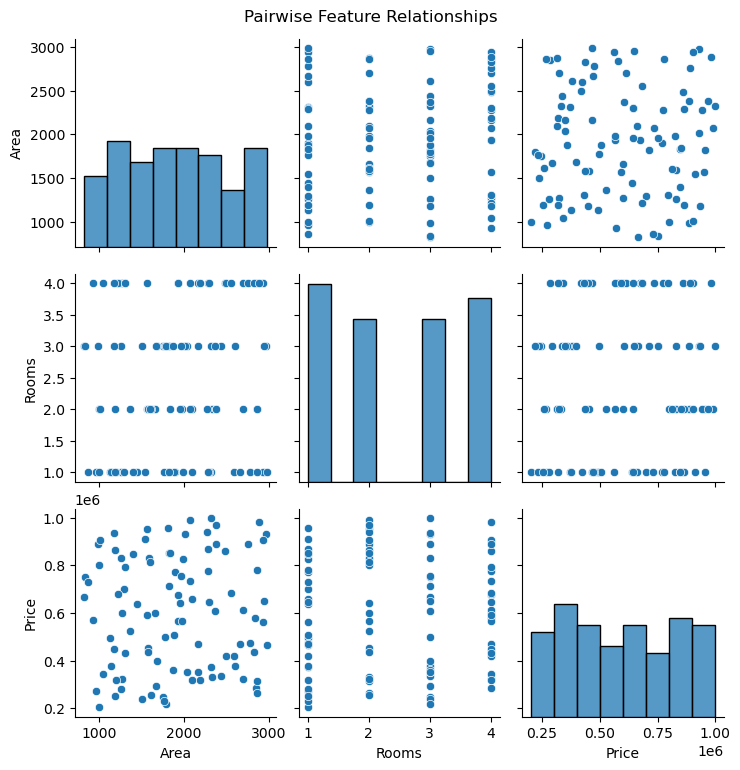

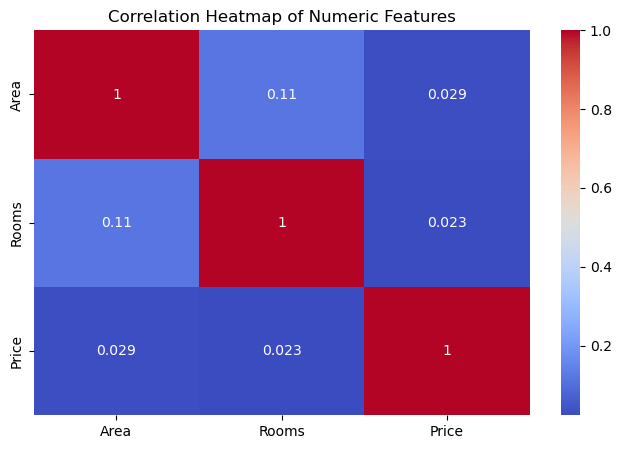

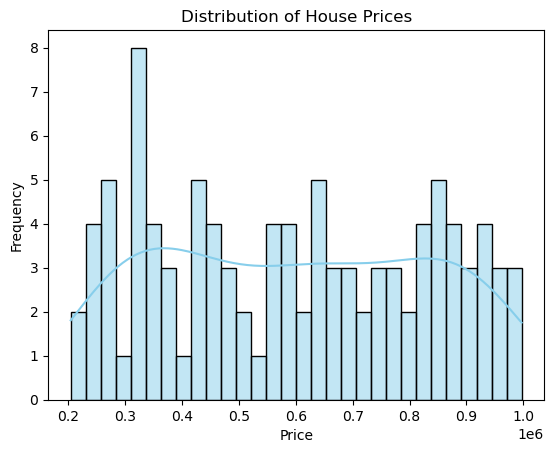

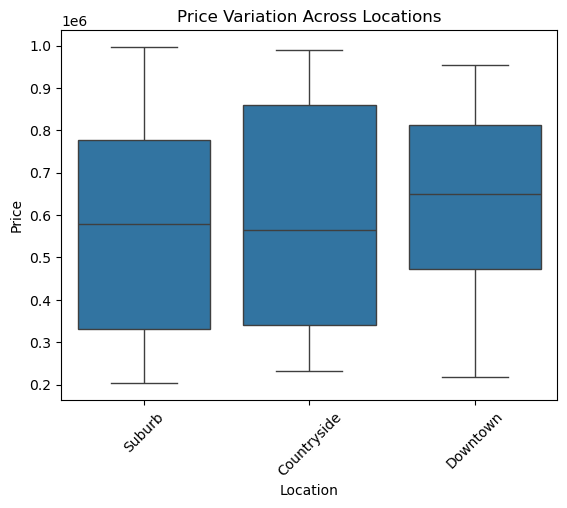


üìâ Linear Regression Evaluation:
MAE: 175933.1626786264
MSE: 48029536917.0439
R¬≤ Score: -0.3151071268959007

üå≥ Random Forest Evaluation:
MAE: 206336.73375
MSE: 60358283206.164
R¬≤ Score: -0.652683192609739


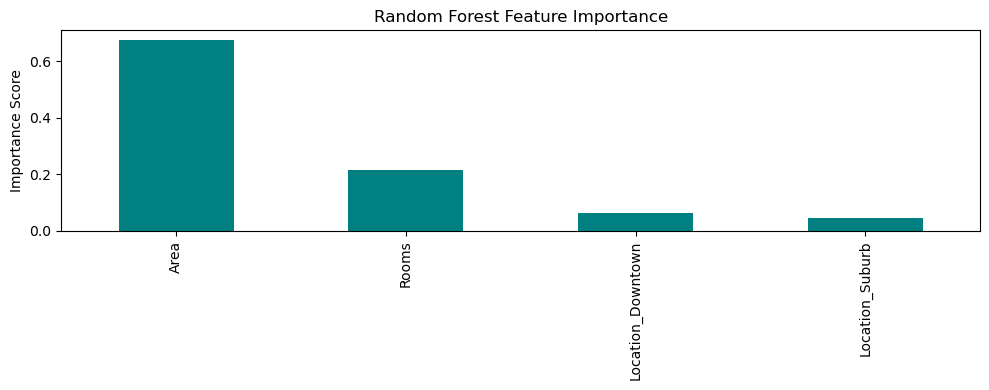


‚úÖ Best Random Forest Parameters from Grid Search:
Best Params: {'max_depth': None, 'n_estimators': 200}
Best CV Score: -0.36437737069349113


In [14]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#LOADING THE DATASET
df = pd.read_csv('sample_house_prices.csv')
print("FIRST FEW ROWS OF THE DATASET:")
print(df.info())

#basic data understanding
print("\n dataset info:")
print(df.info())

print("\n statistical summary")
print(df.describe())

# üìà Visual Exploration of Data Relationships
sns.pairplot(df)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# üî• Correlation Analysis
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# üßÆ Visualizing Target Variable Distribution
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# üèòÔ∏è Location-wise Price Comparison
sns.boxplot(x="Location", y="Price", data=df)
plt.title("Price Variation Across Locations")
plt.xticks(rotation=45)
plt.show()

# üßπ Data Preprocessing
# One-hot encoding categorical variables and handling missing data
df_cleaned = pd.get_dummies(df, drop_first=True)
df_cleaned = df_cleaned.dropna()

# üîÑ Feature and Target Split
X = df_cleaned.drop('Price', axis=1)
y = df_cleaned['Price']

# üß™ Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üìê Training a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# üìä Linear Regression Evaluation
lr_predictions = lr_model.predict(X_test)
print("\nüìâ Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, lr_predictions))
print("MSE:", mean_squared_error(y_test, lr_predictions))
print("R¬≤ Score:", r2_score(y_test, lr_predictions))

# üå≤ Training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# üå≤ Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
print("\nüå≥ Random Forest Evaluation:")
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R¬≤ Score:", r2_score(y_test, rf_predictions))

# üîç Feature Importance Visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 4))
feature_importance.plot(kind='bar', color='teal')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# üõ†Ô∏è Hyperparameter Tuning with Grid Search CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\n‚úÖ Best Random Forest Parameters from Grid Search:")
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
